<a href="https://colab.research.google.com/github/sanskritisaxenaaa/sanskriti/blob/main/CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn-1.csv to customer_churn-1.csv


In [3]:
import pandas as pd
df = pd.read_csv('customer_churn-1.csv')

# Extract the 5th column
customer_5 = df.iloc[:, 4]

# Extract the 15th column
customer_15 = df.iloc[:, 14]

# Extract all male senior citizens with electronic check payment method
senior_male_electronic = df[
    (df["gender"] == "Male") & (df["SeniorCitizen"] == 1) & (df["PaymentMethod"] == "Electronic check")
]

# Extract customers with tenure > 70 months or monthly charges > $100
customer_total_tenure = df[(df["tenure"] > 70) | (df["MonthlyCharges"] > 100)]

# Display summaries
customer_5.head(), customer_15.head(), senior_male_electronic.shape, customer_total_tenure.shape


(0    No
 1    No
 2    No
 3    No
 4    No
 Name: Dependents, dtype: object,
 0    No
 1    No
 2    No
 3    No
 4    No
 Name: StreamingMovies, dtype: object,
 (298, 21),
 (1259, 21))

In [4]:
# Extract customers with two-year contract, mailed check payment method, and churn = 'Yes'
two_mail_yes = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]

# Extract 333 random records
customer_333 = df.sample(n=333, random_state=42)

# Get count of different levels from the 'Churn' column
churn_counts = df["Churn"].value_counts()

# Display summaries
two_mail_yes.shape, customer_333.shape, churn_counts


((3, 21),
 (333, 21),
 Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64)

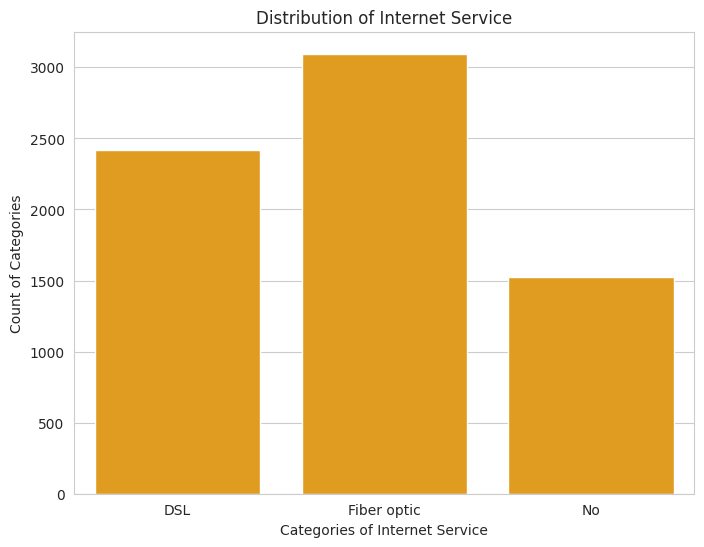

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create bar plot for InternetService column
sns.countplot(x=df["InternetService"], color="orange")

# Set labels and title
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

# Show the plot
plt.show()


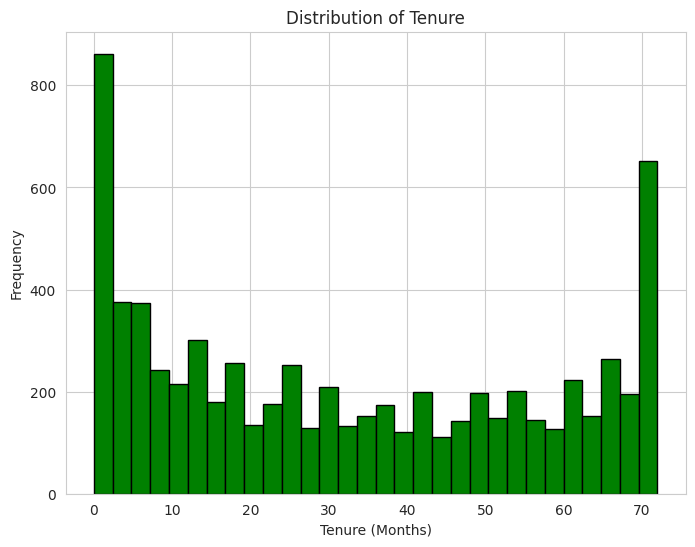

In [6]:
# Set plot size
plt.figure(figsize=(8, 6))

# Create histogram for tenure column
plt.hist(df["tenure"], bins=30, color="green", edgecolor="black")

# Set labels and title
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.title("Distribution of Tenure")

# Show the plot
plt.show()


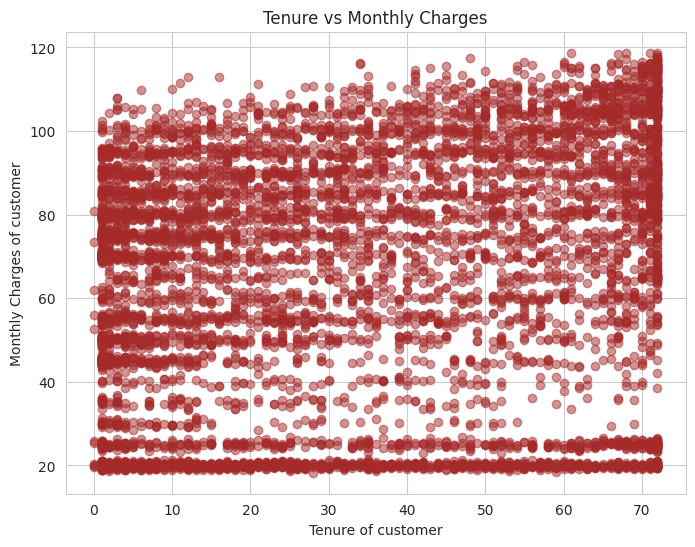

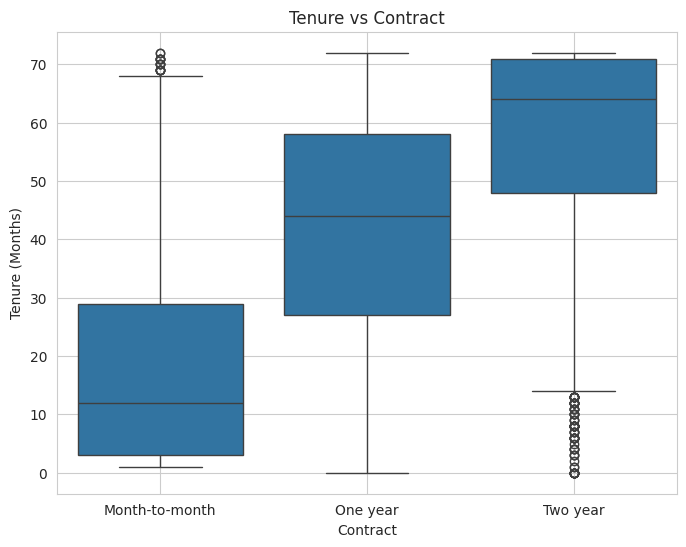

In [7]:
# Create scatter plot for MonthlyCharges vs tenure
plt.figure(figsize=(8, 6))
plt.scatter(df["tenure"], df["MonthlyCharges"], color="brown", alpha=0.5)
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.grid(True)
plt.show()

# Create box plot for tenure vs Contract
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Contract"], y=df["tenure"])
plt.xlabel("Contract")
plt.ylabel("Tenure (Months)")
plt.title("Tenure vs Contract")
plt.grid(True)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define independent and dependent variables
X = df[["tenure"]]
y = df["MonthlyCharges"]

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the error in prediction
error = y_test - y_pred

# Compute the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
error.head(), rmse


(185    -30.306590
 2715   -42.185209
 3825   -51.475579
 1807    21.243410
 132    -24.898812
 Name: MonthlyCharges, dtype: float64,
 29.07936015646814)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert 'Churn' column to binary (Yes=1, No=0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Simple logistic regression (MonthlyCharges as independent variable)
X_simple = df[["MonthlyCharges"]]
y = df["Churn"]

# Split dataset into training (65%) and testing (35%) sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.35, random_state=42
)

# Build logistic regression model
logistic_simple = LogisticRegression()
logistic_simple.fit(X_train_simple, y_train_simple)

# Predict on test set
y_pred_simple = logistic_simple.predict(X_test_simple)

# Confusion matrix and accuracy score for simple logistic regression
conf_matrix_simple = confusion_matrix(y_test_simple, y_pred_simple)
accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)

# Multiple logistic regression (tenure and MonthlyCharges as independent variables)
X_multiple = df[["tenure", "MonthlyCharges"]]

# Split dataset into training (80%) and testing (20%) sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

# Build logistic regression model
logistic_multi = LogisticRegression()
logistic_multi.fit(X_train_multi, y_train_multi)

# Predict on test set
y_pred_multi = logistic_multi.predict(X_test_multi)

# Confusion matrix and accuracy score for multiple logistic regression
conf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

# Display results
conf_matrix_simple, accuracy_simple, conf_matrix_multi, accuracy_multi


(array([[1797,    0],
        [ 669,    0]]),
 0.7287104622871047,
 array([[944,  92],
        [193, 180]]),
 0.7977288857345636)

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Define independent and dependent variables
X_tree = df[["tenure"]]
y_tree = df["Churn"]

# Split dataset into training (80%) and testing (20%) sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.2, random_state=42
)

# Build the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tree, y_train_tree)

# Predict on test set
y_pred_tree = tree_model.predict(X_test_tree)

# Compute confusion matrix and accuracy
conf_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)

# Display results
conf_matrix_tree, accuracy_tree


(array([[951,  85],
        [257, 116]]),
 0.7572746628814763)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Define independent and dependent variables
X_rf = df[["tenure", "MonthlyCharges"]]
y_rf = df["Churn"]

# Split dataset into training (70%) and testing (30%) sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.3, random_state=42
)

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_rf)

# Compute confusion matrix and accuracy
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

# Display results
conf_matrix_rf, accuracy_rf


(array([[1341,  198],
        [ 308,  266]]),
 0.7605300520586843)